In [73]:
import os
import openai
import seaborn
from scipy import spatial
import numpy as np
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [74]:
# The OpenAI key is stored in a file.
key_location = '/Users/silvi/Downloads/key-location/genaikey.txt'

with open(key_location, 'r') as file:
    key = file.readline().strip()

In [75]:
openai.api_key = key

In [76]:
string1 = "A koala jumped from a tree"
string2 = "A koala jumped from a tree"
string3 = "The sky is blue"

In [77]:
# https://platform.openai.com/docs/guides/embeddings/what-are-embeddings?lang=python

response = openai.embeddings.create(
    input=[string1, string2, string3],
    model="text-embedding-3-small"
)

In [78]:
print(response)
print(response.data[0].embedding)
print(response.data[1].embedding)
print(response.data[2].embedding)

CreateEmbeddingResponse(data=[Embedding(embedding=[-0.029825812205672264, 0.007802668493241072, 0.021490998566150665, -0.011066068895161152, 0.024555645883083344, 0.0511372908949852, 0.03462153673171997, 0.022311657667160034, 0.017092781141400337, -0.02283739112317562, 0.008046301081776619, 0.004609793424606323, -0.0411355160176754, -0.017285123467445374, 0.005289401393383741, -0.05821547284722328, 0.04110986739397049, 0.0014097056118771434, -0.08237361162900925, 0.05044486001133919, -0.027312545105814934, 0.02050364390015602, 0.00035763566847890615, -0.023670872673392296, 0.04093034937977791, -0.03731432184576988, -0.009142650291323662, -0.03975065425038338, -0.018952084705233574, -0.018426351249217987, 0.03323667496442795, -0.02547888644039631, -0.028851279988884926, 0.04585430026054382, -0.02472234144806862, 0.003168832277879119, -0.029825812205672264, -0.024209430441260338, -0.029056444764137268, -0.054573800414800644, 0.001154051162302494, -0.007379516493529081, 0.0034974163863807

In [79]:
# https://stackoverflow.com/a/18424933

cosine_similarity1 = 1 - spatial.distance.cosine(response.data[0].embedding, response.data[1].embedding)

print(cosine_similarity1)

cosine_similarity2 = 1 - spatial.distance.cosine(response.data[1].embedding, response.data[2].embedding)

print(cosine_similarity2)

1.0
0.185960140312586


<Axes: >

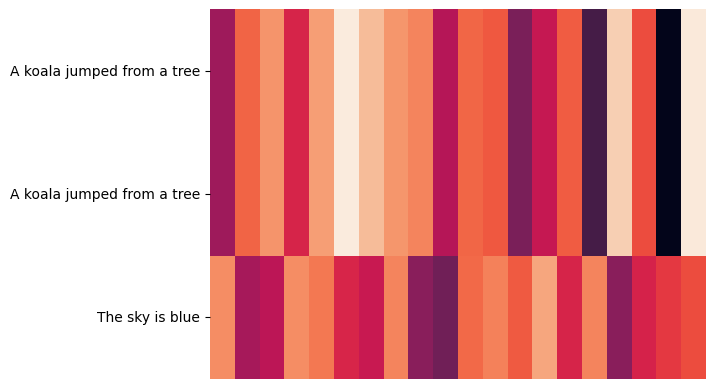

In [80]:
# heatmap among equal strings
seaborn.heatmap([response.data[0].embedding[:20], response.data[1].embedding[:20],response.data[2].embedding[:20]], 
                cbar=False, xticklabels=False, yticklabels=[string1, string2, string3]
                )


In [81]:
# store the embeddings in a 2d numpy array
embeddings = [response.data[0].embedding, 
              response.data[1].embedding, 
              response.data[2].embedding]
embeddings_array = np.array(embeddings)

print("Shape: " + str(embeddings_array.shape))
print(embeddings_array)

Shape: (3, 1536)
[[-0.02982581  0.00780267  0.021491   ...  0.01405378  0.03303151
   0.02473516]
 [-0.02982581  0.00780267  0.021491   ...  0.01405378  0.03303151
   0.02473516]
 [ 0.01938445 -0.02731501 -0.02043782 ... -0.01850059 -0.00168751
   0.00185853]]


In [82]:
# reducing the embedding dimension with PCA
# https://learn.deeplearning.ai/courses/google-cloud-vertex-ai/lesson/4/visualizing-embeddings

# Perform PCA for 2D visualization
PCA_model = PCA(n_components = 2)
PCA_model.fit(embeddings_array)
new_values = PCA_model.transform(embeddings_array)

In [83]:
print("Shape: " + str(new_values.shape))
print(new_values)

Shape: (3, 2)
[[-4.25320765e-01  5.20417043e-18]
 [-4.25320765e-01  5.20417043e-18]
 [ 8.50641529e-01  7.37257477e-18]]


In [84]:
print(new_values[:,0])
print(new_values[:,1])

[-0.42532076 -0.42532076  0.85064153]
[5.20417043e-18 5.20417043e-18 7.37257477e-18]


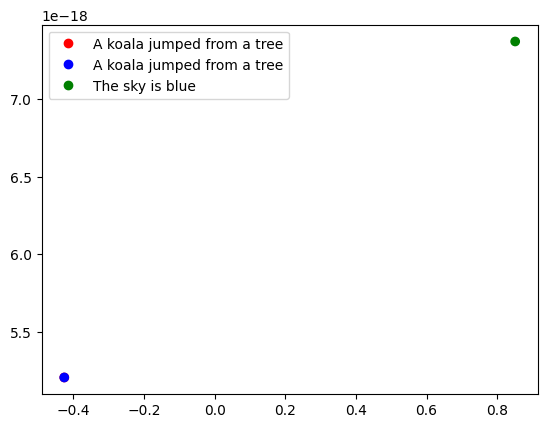

In [86]:
colours = ListedColormap(['r','b','g'])
values = [0, 1, 2]
scatter = plt.scatter(new_values[:,0], new_values[:,1], c=values, cmap=colours)
classes = [string1, string2, string3]
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

plt.show()